<h1>
<font color="#ff2e2e">
Color Space Conversion
</font>
</h1>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import math

<h1>part a</h1>


In [2]:
def rgb_to_cmyk(rgb):
    r, g, b = rgb[0]/255, rgb[1]/255, rgb[2]/255
    k = 1 - max(r, g, b)
    if k == 1:
        return [0, 0, 0, 1]
    c = (1 - r - k) / (1 - k)
    m = (1 - g - k) / (1 - k)
    y = (1 - b - k) / (1 - k)
    return [c*100, m*100, y*100, k*100]

def cmyk_to_rgb(cmyk):
    r = 255 * (1 - (cmyk[0]/100)) * (1 - (cmyk[3]/100))
    g = 255 * (1 - (cmyk[1]/100)) * (1 - (cmyk[3]/100))
    b = 255 * (1 - (cmyk[2]/100)) * (1 - (cmyk[3]/100))
    return [math.ceil(r), math.ceil(g), math.ceil(b)]


rgb_color = [50, 70, 130]
cmyk_color = rgb_to_cmyk(rgb_color)
print("RGB: ", rgb_color)
print("CMYK: ", cmyk_color)
rgb_color_from_cmyk = cmyk_to_rgb(cmyk_color)
print("RGB from CMYK: ", rgb_color_from_cmyk)



RGB:  [50, 70, 130]
CMYK:  [61.53846153846154, 46.153846153846146, 0.0, 49.01960784313726]
RGB from CMYK:  [50, 70, 130]


<h3><font color = "#079e05"> This function is used to plot your result </font></h3>

In [3]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

<h3><font color = "#079e05"> BGR to YCbCr </font></h3>

In [4]:
def convert_to_ycbcr(image):
    '''
    Converts the color space of the input image to the YCbCr color space.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
    '''

    #############
    # Your code #
    #############
    result=cv2.cvtColor(image,cv2.COLOR_BGR2YCrCb)
    
    return result

<h3><font color = "#079e05"> BGR to HSV </font></h3>

In [5]:
def convert_to_hsv(image):
    '''
    Converts the color space of the input image to the HSV color space.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
    '''

    #############
    # Your code #
    #############
    result=cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        
    return result

<h3><font color = "#079e05"> Show the result </font></h3>

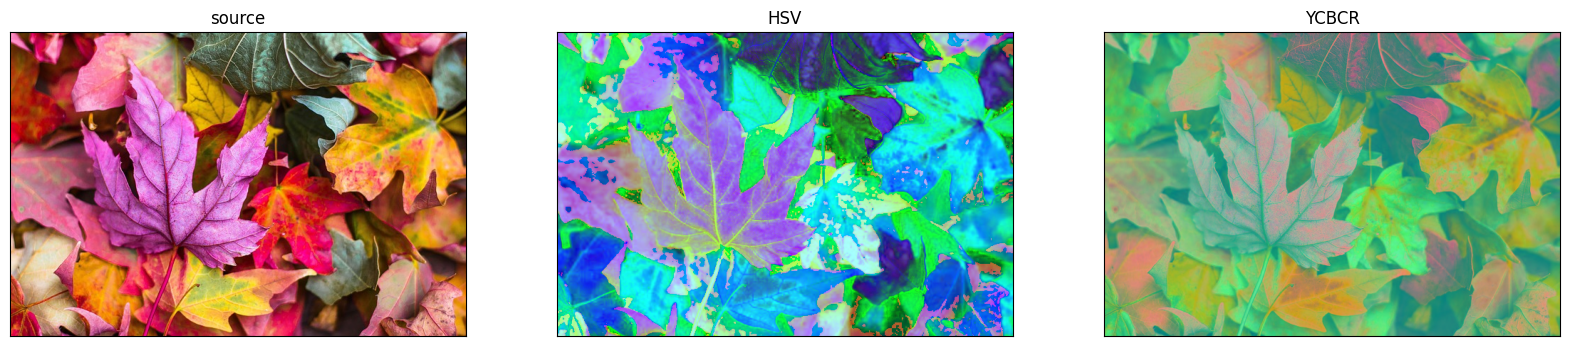

In [6]:
image_list = []
image = cv2.imread(os.path.join('images/Q1', '1.jpg'))
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])
image_list.append([convert_to_hsv(image), 'HSV', 'img'])
image_list.append([convert_to_ycbcr(image), 'YCBCR', 'img'])
plotter(image_list,1 , 3, True, 20, 10, '2A')

<h1>part c</h1>

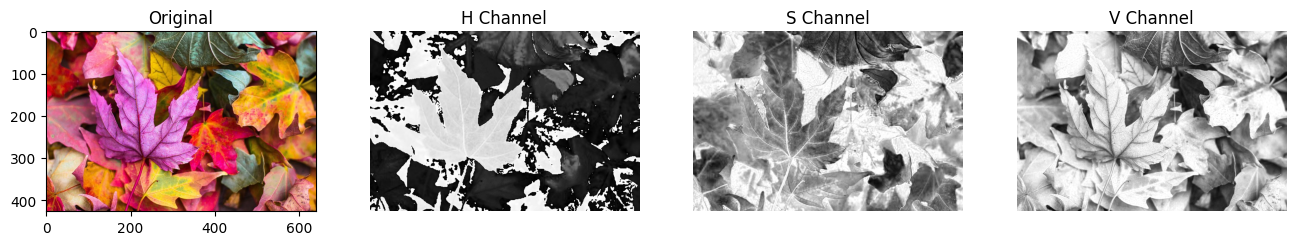

In [7]:
# Convert the image to the HSV color space
hsv_img=convert_to_hsv(image)

# Separate the H, S, and V channels
h_channel,s_channel,v_channel=cv2.split(hsv_img)

# Display the channels using Matplotlib
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16, 5))

# Display the original image
axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original')

# Display the H channel
axs[1].imshow(h_channel, cmap='gray')
axs[1].set_title('H Channel')
axs[1].axis('off')

# Display the S channel
axs[2].imshow(s_channel, cmap='gray')
axs[2].set_title('S Channel')
axs[2].axis('off')

# Display the V channel
axs[3].imshow(v_channel, cmap='gray')
axs[3].set_title('V Channel')
axs[3].axis('off')

plt.show()


<h1>
<font color="#ff2e2e">
Finding Differences
</font>
</h1>

In [8]:
def dif(image1, image2):
    '''
    Creates a new image that differences between two input images are shown.
    
    Parameters:
        image1 (numpy.ndarray): The first input image.
        image2 (numpy.ndarray): The second input image.
    
    Returns:
        numpy.ndarray: The result difference image.
    '''
    #############
    # Your code #
    #############
    
    image1=image1[0:916,0:921]
    image2=image2[0:916,0:921]
    
    # show image
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(image1,cmap='gray')
    ax1.set_title('Image 1')
    ax2.imshow(image2,cmap='gray')
    ax2.set_title('Image 2')
    plt.show()
    
    result=cv2.merge([image1,image2, image2])
    print(image1.shape,image2.shape)
    
    return result

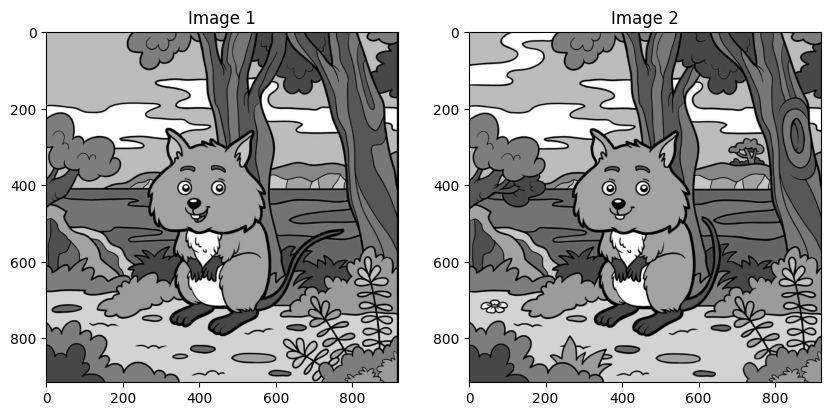

(916, 921) (916, 921)


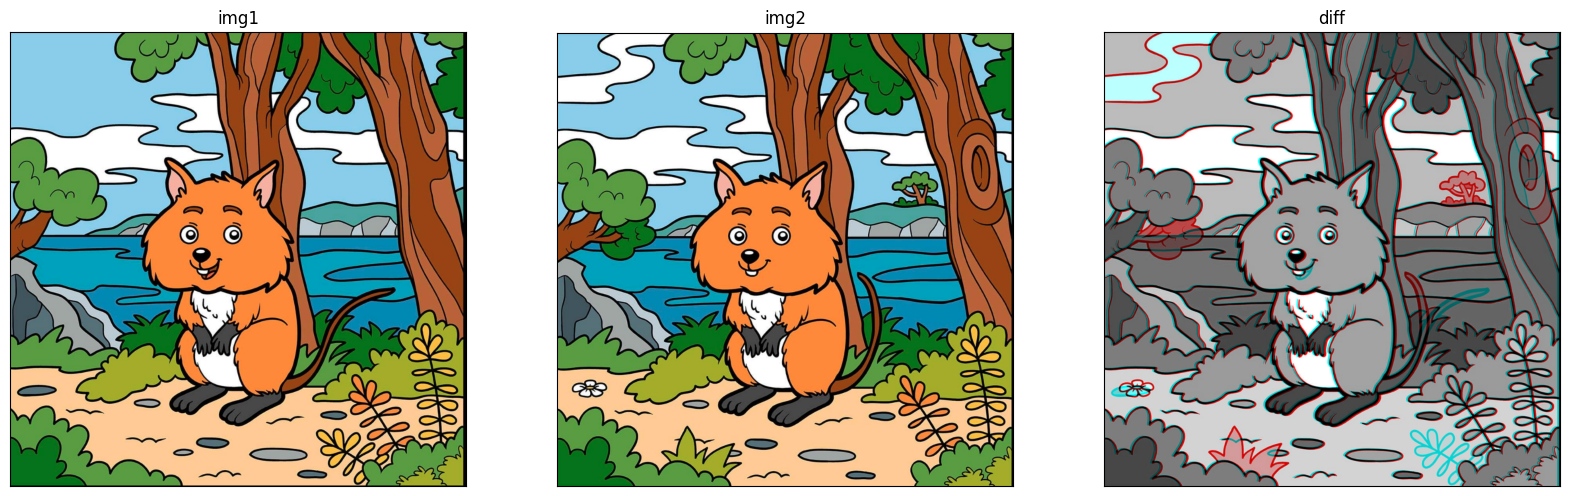

In [9]:
image_list = []

image1 = cv2.imread(os.path.join('images/Q1', '2.png'))
image_list.append([cv2.cvtColor(image1, cv2.COLOR_BGR2RGB), 'img1', 'img'])
image2 = cv2.imread(os.path.join('images/Q1', '3.png'))
image_list.append([cv2.cvtColor(image2, cv2.COLOR_BGR2RGB), 'img2', 'img'])

image1 = cv2.imread(os.path.join('images/Q1', '2.png'), cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread(os.path.join('images/Q1', '3.png'), cv2.IMREAD_GRAYSCALE)
diffimg=dif(image1, image2)
image_list.append([diffimg, 'diff', 'img'])

plotter(image_list,1 , 3, True, 20, 10, '2B')
